In [60]:
import pandas as pd
import numpy as np
import datetime
df = pd.read_excel("/content/datos_demograficos.xlsx", sheet_name="train_datos_demograficos")
df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3319219.0,65286039,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,33255983.0,71194033,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,57460998.0,55631737,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,33628497.0,66424853,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,84553317.0,1197141,GT Bank,NaN,Permanent,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5833 entries, 0 to 5832
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  5833 non-null   object        
 1   birthdate                   5833 non-null   datetime64[ns]
 2   bank_account_type           5833 non-null   object        
 3   longitude_gps               5833 non-null   float64       
 4   latitude_gps                5833 non-null   int64         
 5   bank_name_clients           5833 non-null   object        
 6   bank_branch_clients         65 non-null     object        
 7   employment_status_clients   4968 non-null   object        
 8   level_of_education_clients  797 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 410.3+ KB


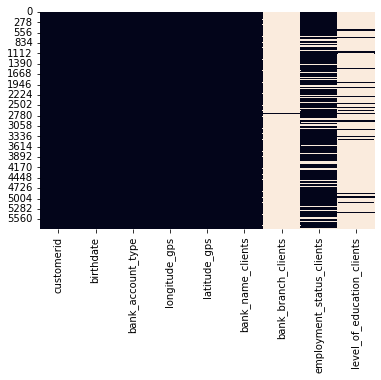

In [61]:
import seaborn as sns
df.isnull()
df.info(verbose=True,null_counts=True)
sns.heatmap(df.isnull(), cbar=False)

Como se puede observar, existen dos varibles con un gran número de valores faltantes. Por ello, se prodecerá a eliminar dichas columnas.

En la columna employment_status_clients se puede observar qye existen valores faltantes, por tanto serán sustituidos ya que no superan el 15%.

In [62]:
df["employment_status_clients"].fillna("Not known", inplace = True) 
df

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3319219.0,65286039,GT Bank,NaN,Not known,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,33255983.0,71194033,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,57460998.0,55631737,Fidelity Bank,NaN,Not known,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,33628497.0,66424853,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,84553317.0,1197141,GT Bank,NaN,Permanent,NaN
...,...,...,...,...,...,...,...,...,...
5828,8a858fc25bafabdc015bb47fda0323e5,1976-04-13,Savings,348119.0,64427279,GT Bank,NaN,Permanent,NaN
5829,8a858e245c214660015c3397e4db389a,1990-10-24,Savings,47382094.0,81797235,GT Bank,NaN,Permanent,NaN
5830,8a858e8b5bc9e7e6015bcd7374077f0c,1988-06-12,Savings,34248251.0,64558023,First Bank,NaN,Permanent,NaN
5831,8a858f2e5c699f3a015c77aa22ed7f23,1974-03-23,Savings,33188513.0,71132122,FCMB,NaN,Permanent,NaN


A continuación, se obtendrá la edad de los clientes a través de la columna birthdate.

In [63]:
def age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df['age'] = df['birthdate'].apply(lambda x: age(x))
df

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3319219.0,65286039,GT Bank,NaN,Not known,NaN,48
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,33255983.0,71194033,Sterling Bank,NaN,Permanent,NaN,36
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,57460998.0,55631737,Fidelity Bank,NaN,Not known,NaN,35
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,33628497.0,66424853,GT Bank,NaN,Permanent,NaN,30
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,84553317.0,1197141,GT Bank,NaN,Permanent,NaN,39
...,...,...,...,...,...,...,...,...,...,...
5828,8a858fc25bafabdc015bb47fda0323e5,1976-04-13,Savings,348119.0,64427279,GT Bank,NaN,Permanent,NaN,46
5829,8a858e245c214660015c3397e4db389a,1990-10-24,Savings,47382094.0,81797235,GT Bank,NaN,Permanent,NaN,31
5830,8a858e8b5bc9e7e6015bcd7374077f0c,1988-06-12,Savings,34248251.0,64558023,First Bank,NaN,Permanent,NaN,33
5831,8a858f2e5c699f3a015c77aa22ed7f23,1974-03-23,Savings,33188513.0,71132122,FCMB,NaN,Permanent,NaN,48


In [31]:
pip install geocoder

     |████████████████████████████████| 98 kB 3.7 MB/s 


In [ ]:
import geocoder

def geo_rev(x):
    g = geocoder.osm([x.latitude_gps, x.longitude_gps], method='reverse').json
    if g:
        return g.get('country')
    else:
        return 'no country'
df[['latitude_gps', 'longitude_gps']].apply(geo_rev, axis=1)

In [64]:
# Creamos las variables binarias
bank_account_type = pd.get_dummies(df['bank_account_type'], drop_first = True)
bank_name_clients = pd.get_dummies(df['bank_name_clients'], drop_first = True)
employment_status_clients = pd.get_dummies(df['employment_status_clients'], drop_first = True)
#country = pd.get_dummies(df['country'], drop_first = True)

In [65]:
# Añadimos las variables binarias al DataFrame
df = pd.concat([df, bank_account_type,bank_name_clients,employment_status_clients], axis = 1) #faltarà añadir country

# Eliminamos las varables originales y las que no necesitamos
df.drop(['bank_branch_clients', 'bank_name_clients','employment_status_clients','longitude_gps','latitude_gps','level_of_education_clients','birthdate','bank_account_type'], axis=1, inplace = True)
df

,customerid,age,Other,Savings,Diamond Bank,EcoBank,FCMB,Fidelity Bank,First Bank,GT Bank,...,Union Bank,Unity Bank,Wema Bank,Zenith Bank,Not known,Permanent,Retired,Self-Employed,Student,Unemployed
0,8a858e135cb22031015cbafc76964ebd,48,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,8a858e275c7ea5ec015c82482d7c3996,36,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8a858e5b5bd99460015bdc95cd485634,35,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8a858efd5ca70688015cabd1f1e94b55,30,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,8a858e785acd3412015acd48f4920d04,39,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,8a858fc25bafabdc015bb47fda0323e5,46,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5829,8a858e245c214660015c3397e4db389a,31,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5830,8a858e8b5bc9e7e6015bcd7374077f0c,33,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5831,8a858f2e5c699f3a015c77aa22ed7f23,48,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
df.to_csv('datosdemograficos_limpio.csv', index=False)